## **Trình quản lý gói Pip trong Python**

pip là một trình quản lý gói cho Python. Đây là một công cụ cho phép bạn cài đặt và quản lý các thư viện không được tích hợp sẵn trong thư viện tiêu chuẩn.

Khái niệm về trình quản lý gói có thể quen thuộc với bạn nếu bạn đã học các ngôn ngữ khác như JavaScript sử dụng npm để quản lý gói, Ruby sử dụng gem và .NET sử dụng NuGet. Trong Python, pip đã trở thành trình quản lý gói tiêu chuẩn.

### **Cài đặt một gói với pip**

Ví dụ 1: Bạn có thể viết một tập lệnh truy xuất nội dung của một trang Web chỉ bằng cách sử dụng các thư viện tiêu chuẩn được bao gồm trong Python (nhưng bạn đừng quan tâm đến nó nhé, chúng ta chỉ ví dụ ở đây cho biết nó phức tạp như thế nào thôi!!!).

In [ ]:
import cgi
import http.client

server = 'www.google.com'
url = '/'
conn = http.client.HTTPSConnection(server)
conn.request('GET', url)
response = conn.getresponse()
content_type = response.headers.get('Content-Type')
_, params = cgi.parse_header(content_type)
encoding = params.get('charset')
data = response.read()
text = data.decode(encoding)

print(f'Response returned: {response.status} ({response.reason})')
print('Body:')
print(text)

PyPI lưu trữ một thư viện rất phổ biến để thực hiện các yêu cầu **HTTP** có tên là **requests**. Và chúng ta sẽ tìm hiểu cách cài đặt một gói với pip trong Python qua ví dụ cài đặt gói **requests** này sau đây.

Bước đầu tiên là cài đặt gói **requests** vào môi trường của bạn. Bạn có thể tìm hiểu về các lệnh được hỗ trợ bằng pip bằng cách chạy nó với từ khóa **help:**

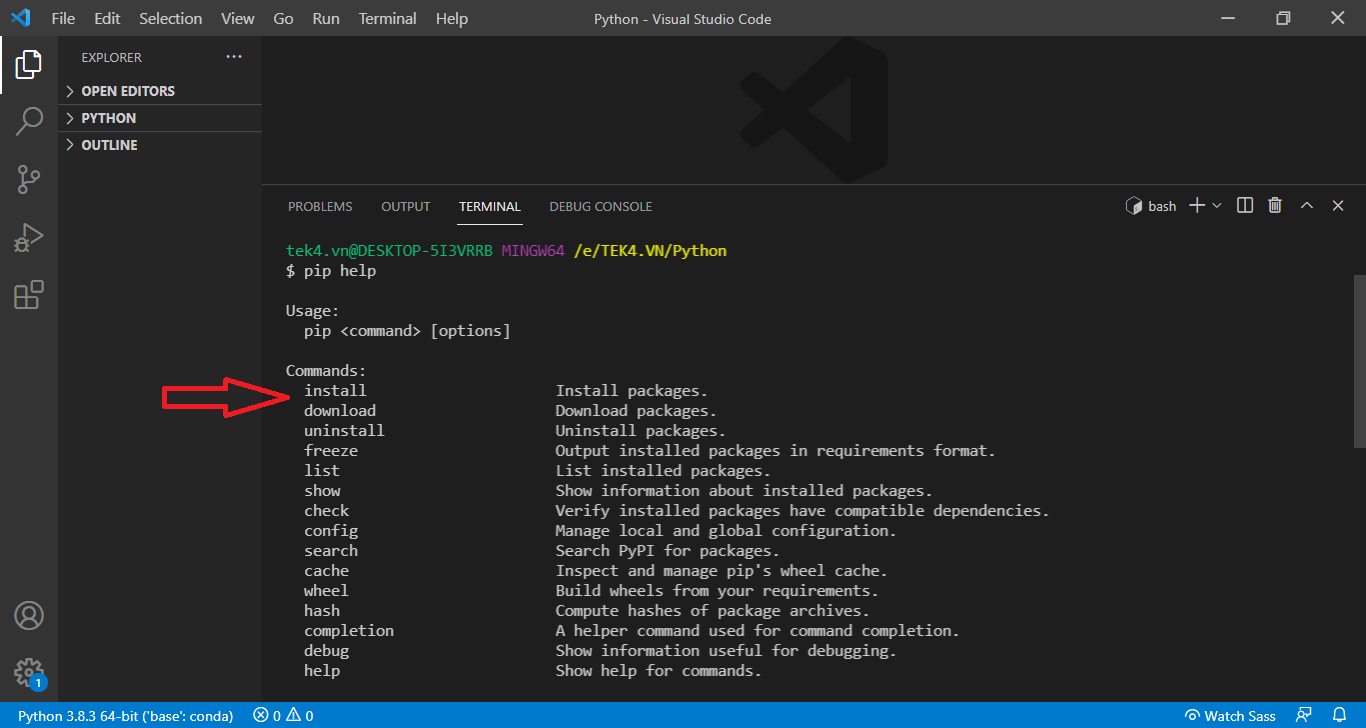

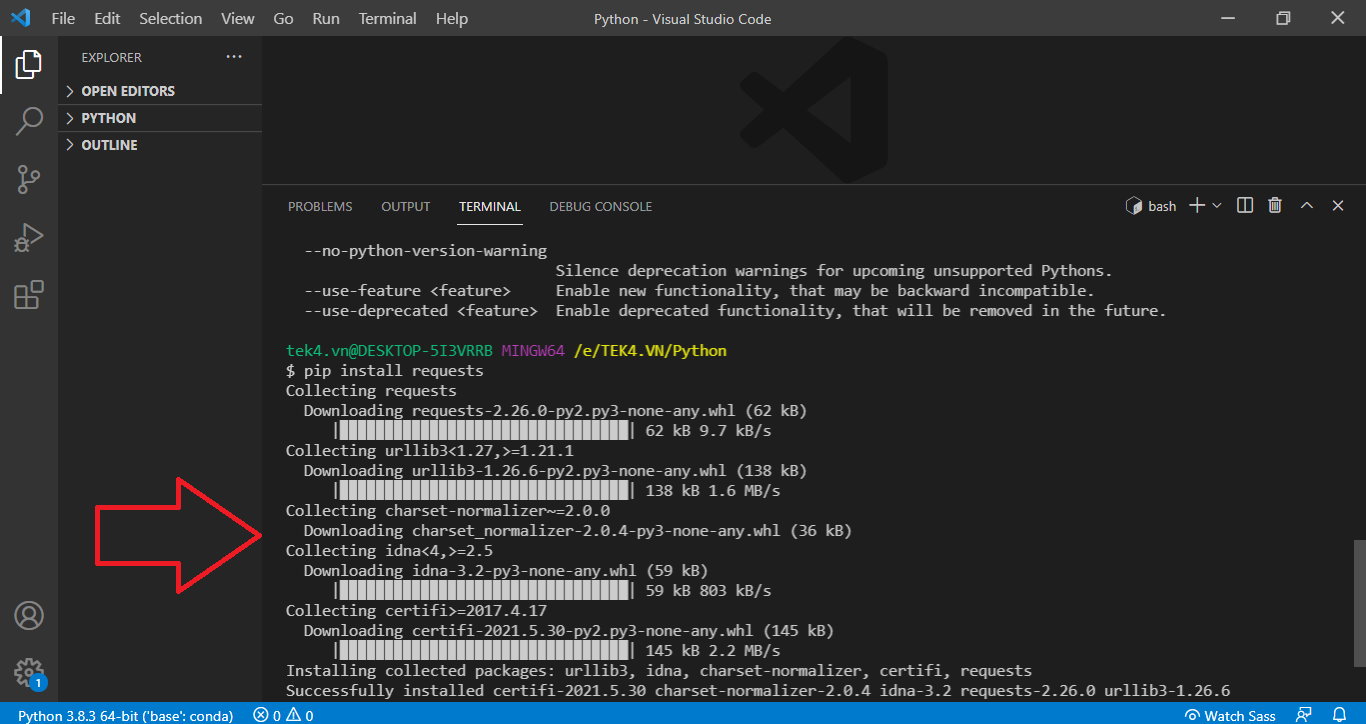

Đôi khi, có thể bạn đang sử dụng công cụ pip với phiên bản cũ hơn trong khi cài đặt:

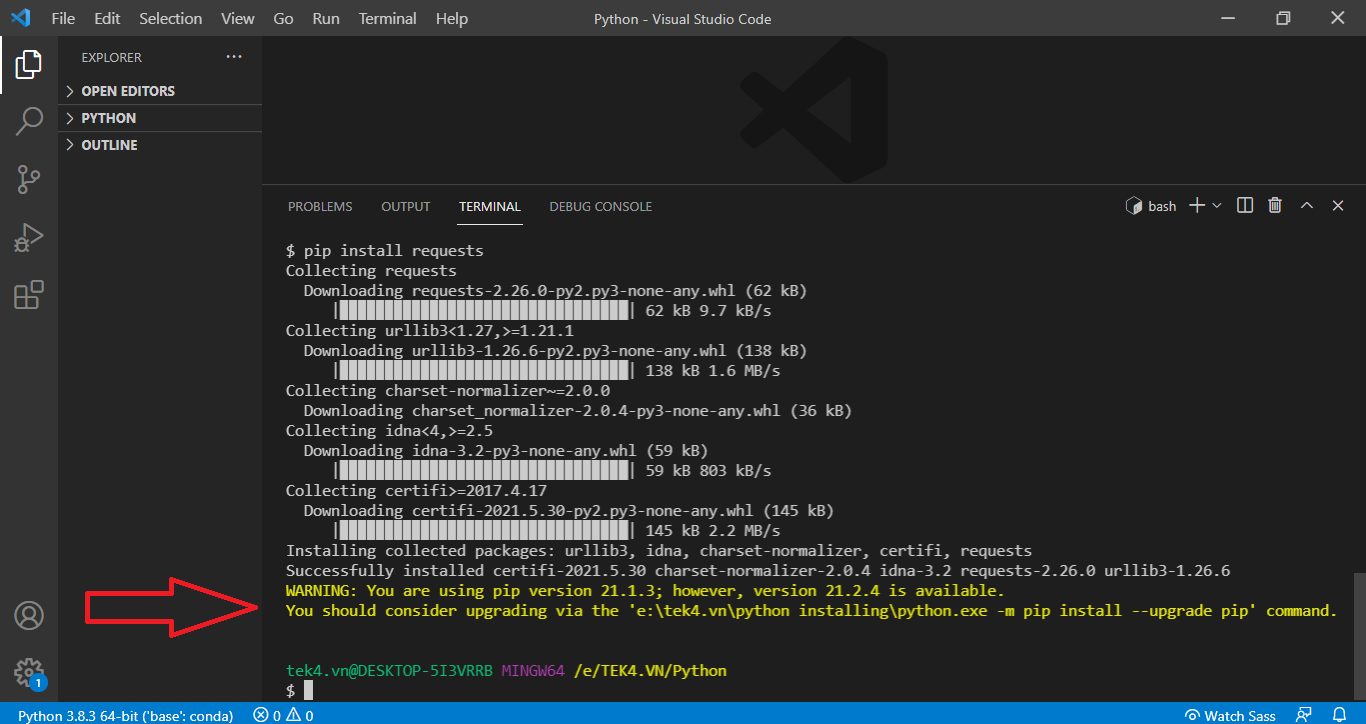

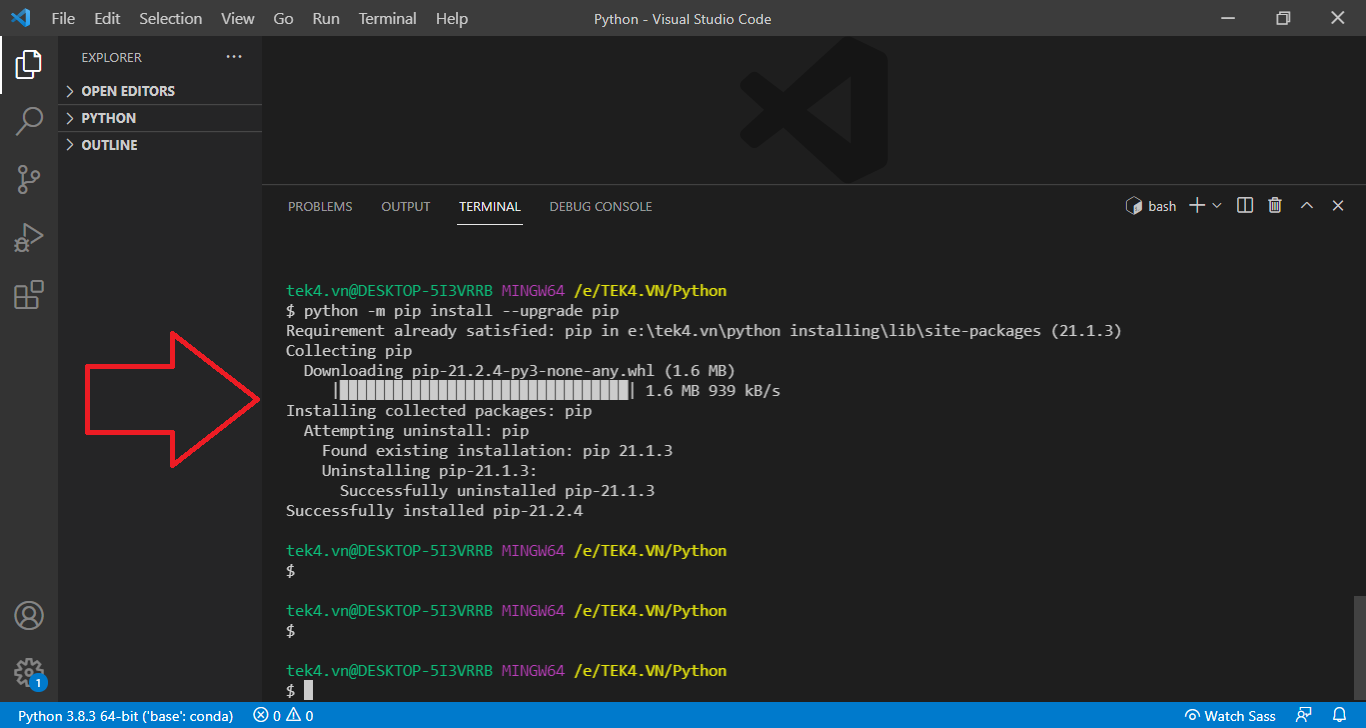

Lưu ý rằng bạn sử dụng python ***-m*** để cập nhật pip. Tùy chọn ***-m*** yêu cầu Python chạy một module dưới dạng tệp thực thi. 

Điều này là cần thiết vì để bạn cập nhật pip, phiên bản cũ phải được gỡ cài đặt trước khi cài đặt phiên bản mới. Khi bạn chạy pip dưới dạng module, Python sẽ tải module trong bộ nhớ và cho phép loại bỏ gói trong khi nó đang được sử dụng. 

Bạn có thể chạy các gói giống như tập lệnh nếu gói cung cấp tập lệnh cấp cao nhất là ***__ main__.py***.

Bây giờ, chúng ta đã cài đặt requests và nâng cấp pip, bạn có thể sử dụng câu lệnh list để xem các gói được cài đặt trong môi trường của bạn:

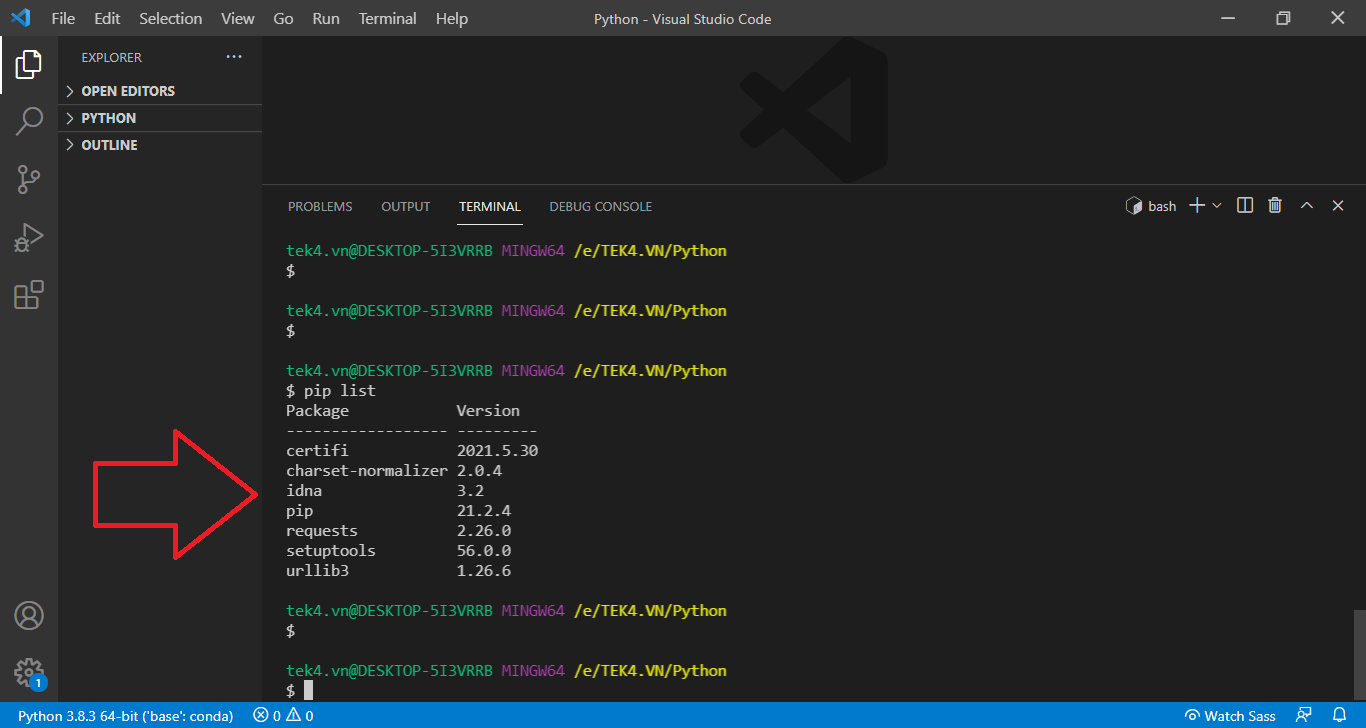

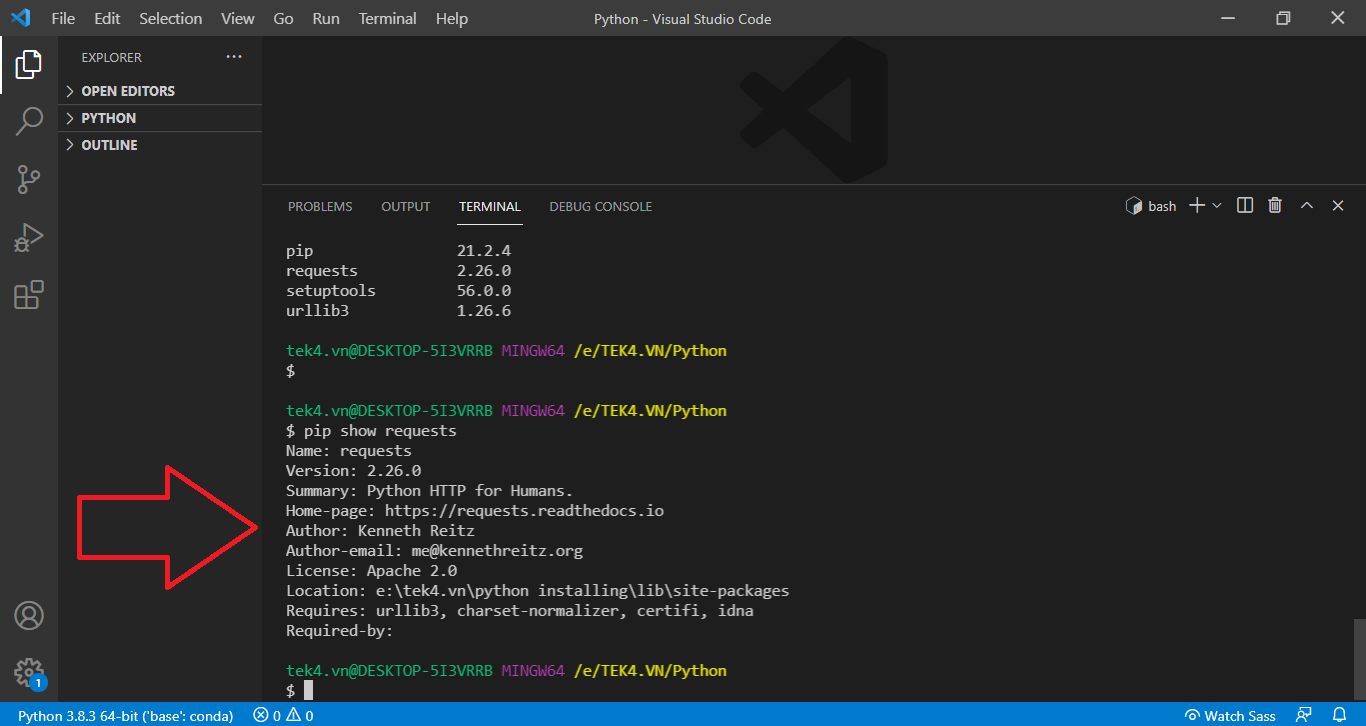

***certifi, chardet, idna và urllib3*** là các phần phụ thuộc và bạn có thể thấy chúng cũng đã được cài đặt.

Với gói requests được cài đặt, bạn có thể sửa đổi Ví dụ 1 ở trên và xem việc truy xuất nội dung của trang Web sẽ trở lên dễ dàng hơn như thế nào:

In [ ]:
import requests

url = 'https://www.google.com'
response = requests.get(url)
print(f'Response returned: {response.status_code}, {response.reason}')
print(response.text)

### **Cài đặt các gói cần thiết theo danh sách**

Đôi khi, bạn muốn cài đặt một loạt các gói theo một danh sách định trước. Đó có thể là các gói yêu cầu để chạy được một đoạn mã hoặc chương trình nào đó mà bạn download được về từ github. 

Lúc đó, bạn có thể đơn giản tập hợp lại các gói cài đặt cần thiết và viết vào một file. Chẳng hạn ở đây, chúng ta sẽ viết tất cả các gói cần cài đặt vào file **requirements.txt**:

Mở ***requirements.txt*** trong trình soạn thảo và thực hiện ghi lại một số gói cần thiết muốn cài đặt như sau:

In [ ]:
certifi>=2018.11.29
chardet>=3.0.4
idna>=2.8
requests>=2.21.0
urllib3>=1.24.1

In [ ]:
pip install -r requirements.txt

pip list

Khi bạn thiết lập một môi trường mới bằng cách sử dụng tệp requirments.txt, pip sẽ tìm kiếm phiên bản mới nhất đáp ứng yêu cầu và cài đặt nó. Bạn có thể chạy câu lệnh sau:

In [ ]:
pip install --upgrade -r requirements.txt

Giả sử rằng phiên bản 3.0 mới của ***requests*** được xuất bản nhưng đưa ra một thay đổi không tương thích làm hỏng ứng dụng của bạn. Bạn có thể sửa đổi tệp ***requirements.txt*** để ngăn việc cài đặt 3.0 hoặc cao hơn như sau:

In [ ]:
requests>=2.21.0, <3.0

Khi bạn viết chương trình đã chạy tốt trên môi trường máy tính của mình, và bạn muốn sao chép các thư viện cần thiết sang môi trường khác, bạn cần xuất ra những gói và phiên bản hiện tại của các gói. 

Để làm được điều này, trong pip hỗ trợ lệnh ***freeze*** để xuất ra các gói đã cài đặt ở định dạng chỉ định. Bạn có thể sử dụng câu lệnh này như sau:

In [ ]:
pip freeze > requirements.txt

cat requirements.txt

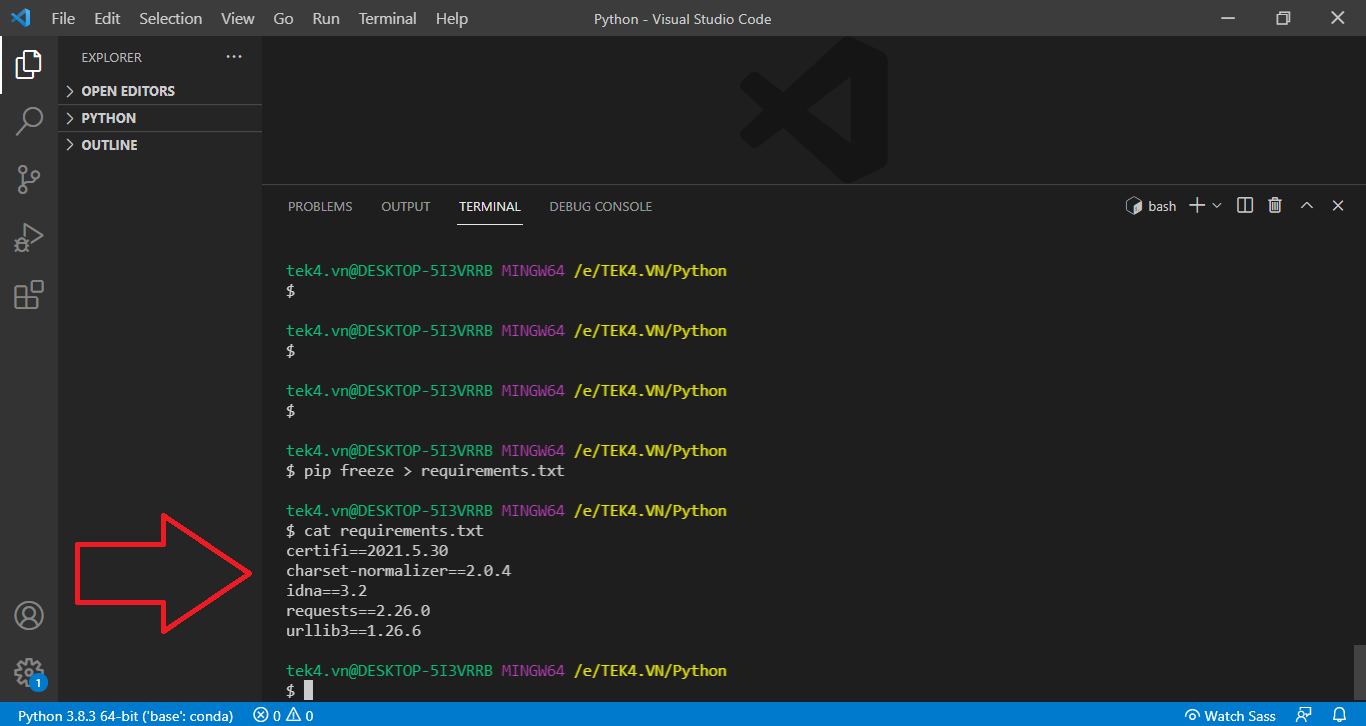

### **Gỡ cài đặt các gói**

Lưu ý rằng, khi bạn cài đặt ***requests***, pip cũng đã cài đặt các thành phần phụ thuộc khác. Trước khi bạn gỡ cài đặt một gói, hãy đảm bảo rằng bạn chạy lệnh show cho gói đó:

In [ ]:
pip show requests

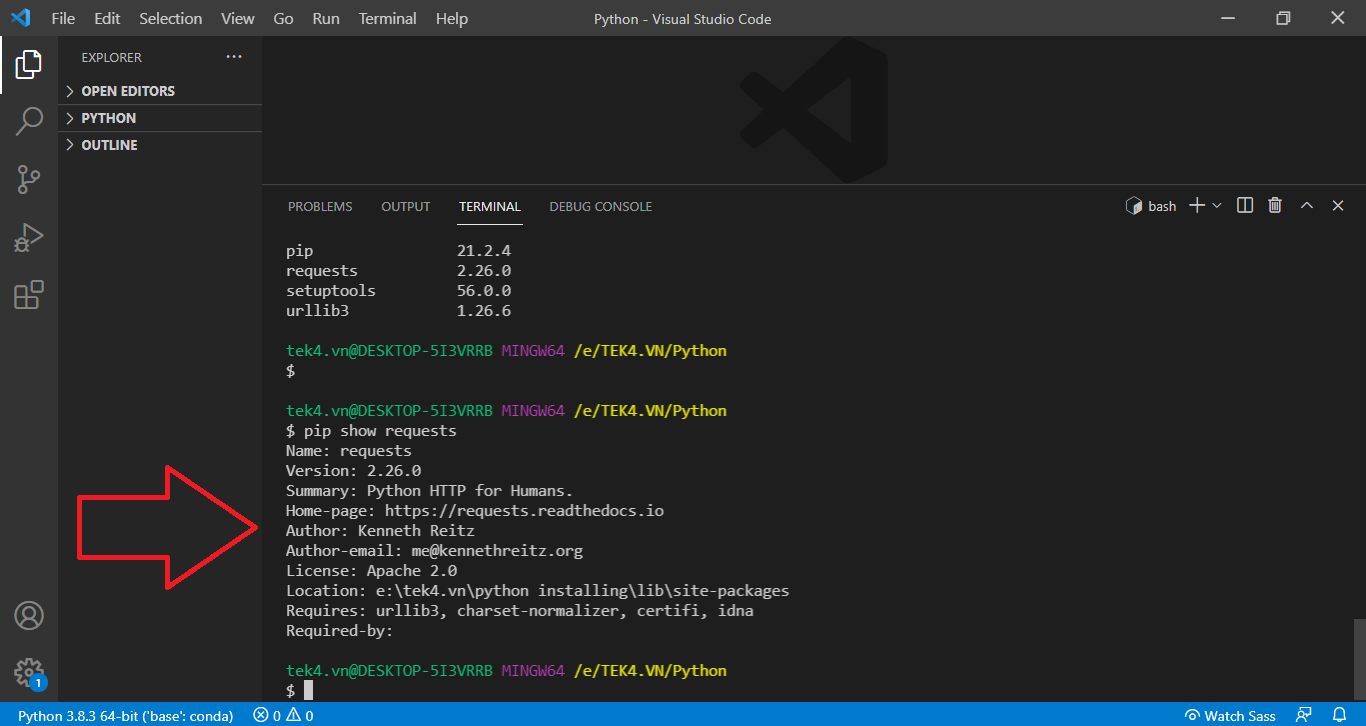

In [ ]:
pip uninstall certifi

Việc gỡ cài đặt một gói sẽ hiển thị cho bạn các tệp sẽ bị xóa và sẽ yêu cầu xác nhận. bạn có thể truyền tùy chọn -y để loại bỏ danh sách tệp và xác nhận:

In [ ]:
$ pip uninstall urllib3 -y
$ pip uninstall chardet -y
$ pip uninstall idna -y
$ pip uninstall requests -y

Bạn có thể chỉ định tất cả các gói bạn muốn gỡ cài đặt trong một lệnh gọi:

In [ ]:
$pip uninstall -y urllib3 chardet idna requests

Bạn cũng có thể gỡ cài đặt tất cả các gói được liệt kê trong tệp yêu cầu bằng cách cung cấp tùy chọn -r < requirements>. không muốn xác nhận truyền -y

In [ ]:
pip uninstall -r requirements.txt -y